# **O Problema da Gorjeta**

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=7791c5b17c449cb00cd4d268168ea12716a6d50f601dd86da319fa62c40fc80c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control
import matplotlib.pyplot as plt
%matplotlib inline

## Variáveis

Define variáveis de entrada e valores para o universo do sistema de controle fuzzy.

*Antecedent/Consequent(universe, label):*
- *universe: universo de valores*
- *label: rótulo da variável*

In [ ]:
servico = control.Antecedent(np.arange(0, 11, 1), 'servico')
comida = control.Antecedent(np.arange(0, 11, 1), 'comida')

In [ ]:
gorjeta = control.Consequent(np.arange(0, 26, 1), 'gorjeta')

## Funções e Gráficos Fuzzy

Popula automaticamente o universo com funções de pertença.

*automf(number):*
- *number: quantidade ou lista de nomes*

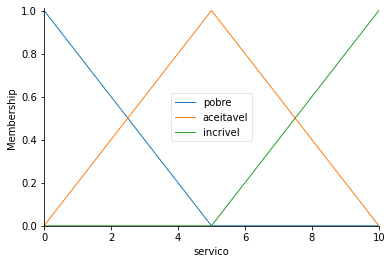

In [ ]:
#servico.automf(3)
servico.automf(names=['pobre', 'aceitavel', 'incrivel'])
servico.view()

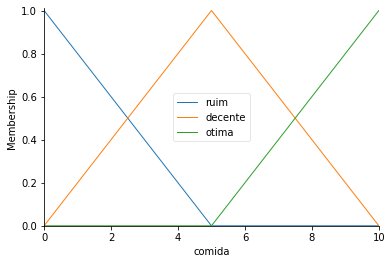

In [ ]:
#comida.automf(5)
comida.automf(names=['ruim', 'decente', 'otima'])
comida.view()

In [ ]:
gorjeta['pouca'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 13, 25])
gorjeta['muita'] = fuzz.trimf(gorjeta.universe, [13, 25, 25])

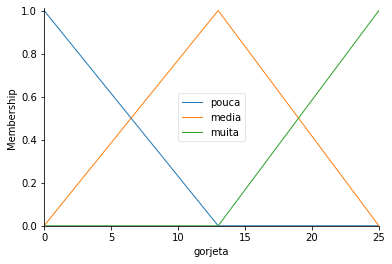

In [ ]:
gorjeta.view()

## Regras Fuzzy

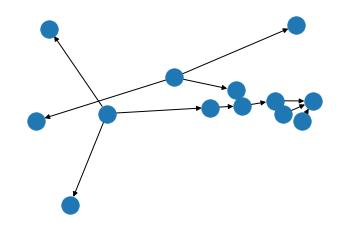

In [ ]:
regra1 = control.Rule(comida['ruim'] | servico['pobre'], gorjeta['pouca'])
regra1.view()
plt.show()

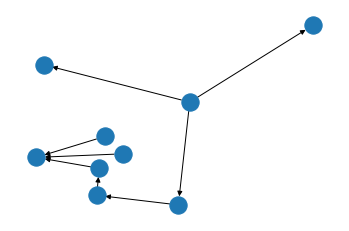

In [ ]:
regra2 = control.Rule(servico['aceitavel'], gorjeta['media'])
regra2.view()
plt.show()

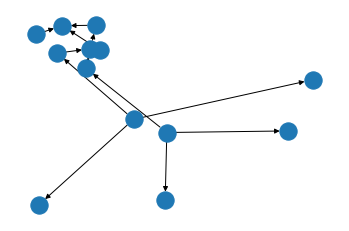

In [ ]:
regra3 = control.Rule(servico['incrivel'] | comida['otima'], gorjeta['muita'])
regra3.view()
plt.show()

## Sistema de Controle Fuzzy

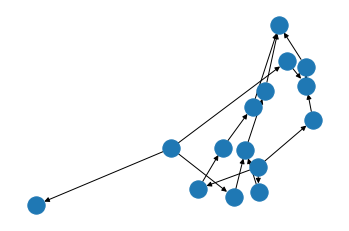

In [ ]:
controle = control.ControlSystem([regra1, regra2, regra3])
controle.view()
plt.show()

## Simulação

In [ ]:
simulacao_gorjeta = control.ControlSystemSimulation(controle)

In [ ]:
simulacao_gorjeta.input['servico'] = 9.8
simulacao_gorjeta.input['comida'] = 6.5

In [ ]:
simulacao_gorjeta.compute()

In [ ]:
print("Quanto incluir de gorjeta na conta? %.2f%%" % simulacao_gorjeta.output['gorjeta'])

Quanto incluir de gorjeta na conta? 19.85%


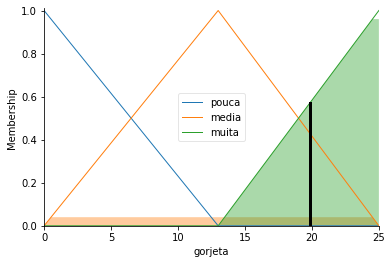

In [ ]:
gorjeta.view(sim=simulacao_gorjeta)